In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('house_price.csv')


In [73]:
df

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2.0,39.07,2,3699
1,2600.0,5.0,120.00,4,4615
2,1440.0,2.0,62.00,3,4305
3,1521.0,3.0,95.00,3,6245
4,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...
13195,3453.0,4.0,231.00,5,6689
13196,3600.0,5.0,400.00,4,11111
13197,1141.0,2.0,60.00,2,5258
13198,4689.0,4.0,488.00,4,10407


In [74]:
df.columns

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [75]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [76]:
print(df.isnull().sum())

total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


### mean function

### percentile

In [33]:
percentiles = df['price_per_sqft'].quantile([0.25, 0.5, 0.75])
print("25th Percentile:", percentiles[0.25])
print("50th Percentile (Median):", percentiles[0.5])
print("75th Percentile:", percentiles[0.75])


25th Percentile: 4267.0
50th Percentile (Median): 5438.0
75th Percentile: 7317.0


In [34]:
# to find outliers 
df[df.price_per_sqft>df.price_per_sqft.quantile(0.80)].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592
18,other,3 BHK,2770.0,4.0,290.0,3,10469
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571


In [53]:
no_outlier=df[df.price_per_sqft<df.price_per_sqft.quantile(0.80)].head()

###  using iqr method

In [36]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Find outliers
outliers = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]


print("Outliers:")
print(outliers)

Outliers:
               location       size  total_sqft  bath  price  bhk  \
7          Rajaji Nagar      4 BHK      3300.0   4.0  600.0    4   
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
22          Thanisandra  4 Bedroom      2800.0   5.0  380.0    4   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
48             KR Puram  2 Bedroom       800.0   1.0  130.0    2   
...                 ...        ...         ...   ...    ...  ...   
13142             other      2 BHK      1140.0   1.0  185.0    2   
13157             other  7 Bedroom      1400.0   7.0  218.0    7   
13185          Hulimavu      1 BHK       500.0   1.0  220.0    1   
13186             other  4 Bedroom      1200.0   5.0  325.0    4   
13191  Ramamurthy Nagar  7 Bedroom      1500.0   9.0  250.0    7   

       price_per_sqft  
7               18181  
9               36274  
22              13571  
45              33333  
48              16250  
...               ...  
13142

In [54]:
# Remove outliers
no_outliers= df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]
no_outliers.head()

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2.0,39.07,2,3699
1,2600.0,5.0,120.00,4,4615
2,1440.0,2.0,62.00,3,4305
3,1521.0,3.0,95.00,3,6245
4,1200.0,2.0,51.00,2,4250


In [38]:
print(no_outliers)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

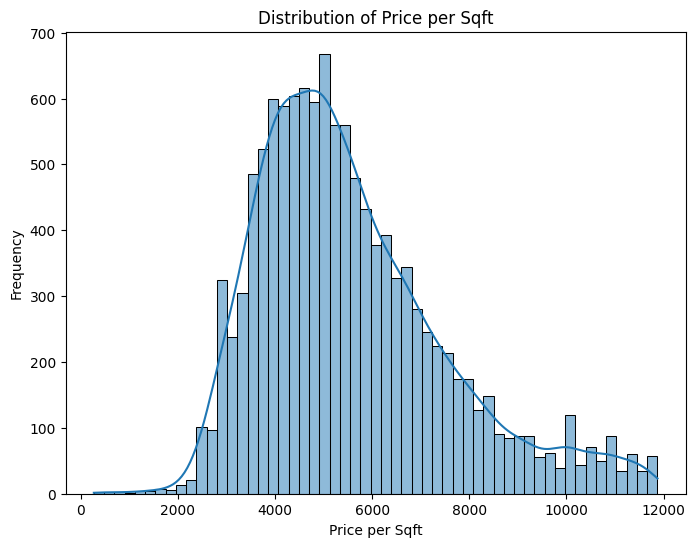

In [71]:
# to check normality
plt.figure(figsize=(8, 6))
sns.histplot(no_outliers['price_per_sqft'], kde=True)
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.title('Distribution of Price per Sqft')
plt.show()


In [61]:
import scipy.stats as stats
skewness = stats.skew(no_outliers['price_per_sqft'])
kurt = stats.kurtosis(no_outliers['price_per_sqft'])
                      
print("Skewness:", skewness)
print("Kurtosis:", kurt)


Skewness: 0.9445732298531184
Kurtosis: 0.6784399584501744


### z_score method

In [62]:
df.price_per_sqft.mean()


7920.336742424242

In [44]:
df.price_per_sqft.std()

106727.16032810867

In [63]:
df.price_per_sqft.var()

11390686751.701813

In [46]:
from scipy import stats

z_scores = np.abs(stats.zscore(df['price_per_sqft']))
threshold = 3  

outliers = df[(z_scores > threshold)]
print(outliers)

             location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3          672727
1106            other  5 Bedroom        24.0   2.0  150.0    5          625000
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000
4924            other      7 BHK         5.0   7.0  115.0    7         2300000
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4          363333


In [47]:
#direct method
mean_price_per_sqft = df['price_per_sqft'].mean()
std_price_per_sqft = df['price_per_sqft'].std()

# Calculate the Z-scores 
z_scores = (df['price_per_sqft'] - mean_price_per_sqft) / std_price_per_sqft

# threshold for outliers 
threshold = 3

# Find outliers based on the threshold
outliers = df[(z_scores > threshold)]

# Print the outliers
print("Outliers:")
print(outliers)


Outliers:
             location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3          672727
1106            other  5 Bedroom        24.0   2.0  150.0    5          625000
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000
4924            other      7 BHK         5.0   7.0  115.0    7         2300000
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4          363333


### boxplot

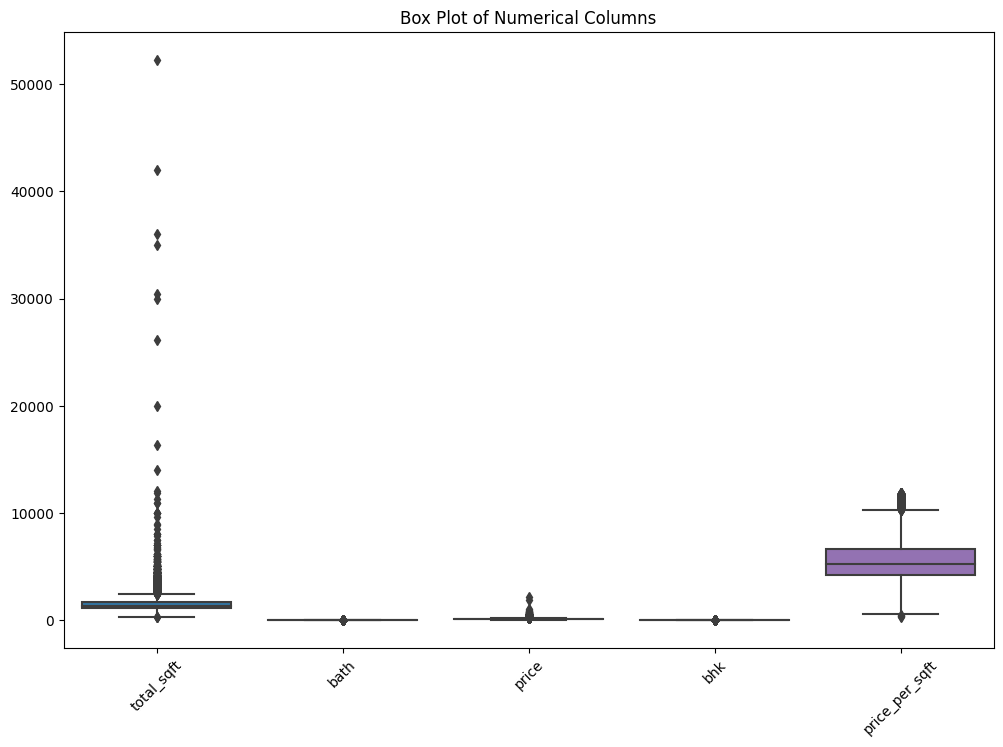

In [64]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=no_outliers)

plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()


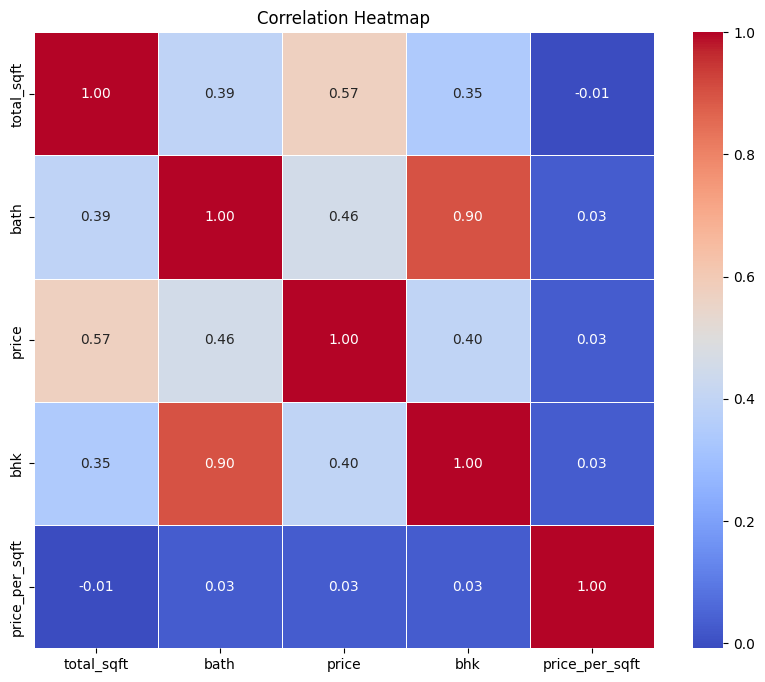

In [66]:


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


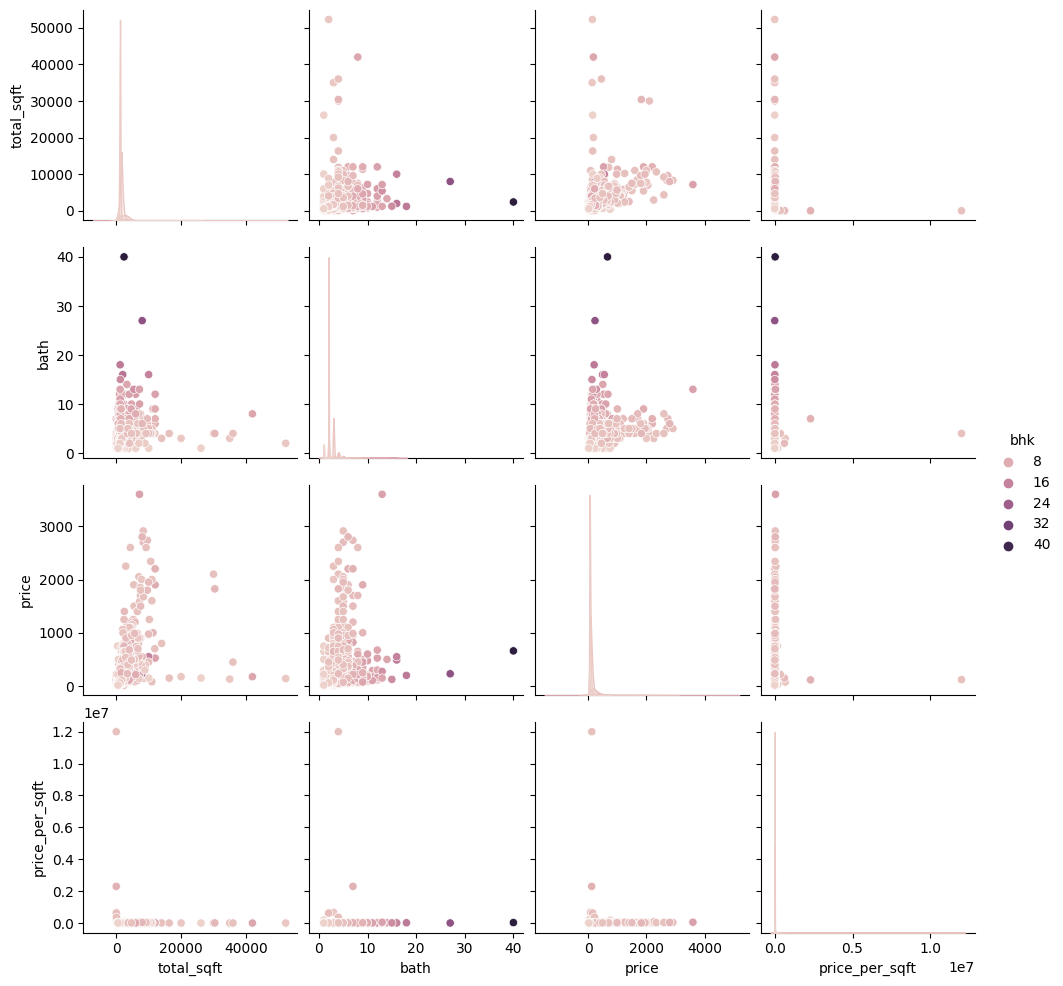

In [69]:

sns.pairplot(df, diag_kind='kde', markers='o', hue='bhk')
plt.show()
